# Spline Interpolation: Pros when it comes to an accuracy of an approximation

Spline interpolation, due to complexities involved in finding 4 coefficients for each of the (n-1) equations if n points are given is a little challenging to implement, but thankfully, we have a SciPy.Interpolate package to do the job for us.

Below is the code which evaluates the performance of Lagrange, Linear and Spline Interpolations in approximating the function: $y=\frac{1}{1+x^2}$ on the domain x$\epsilon$[-5, 5] with 20 randomly generated points from it.

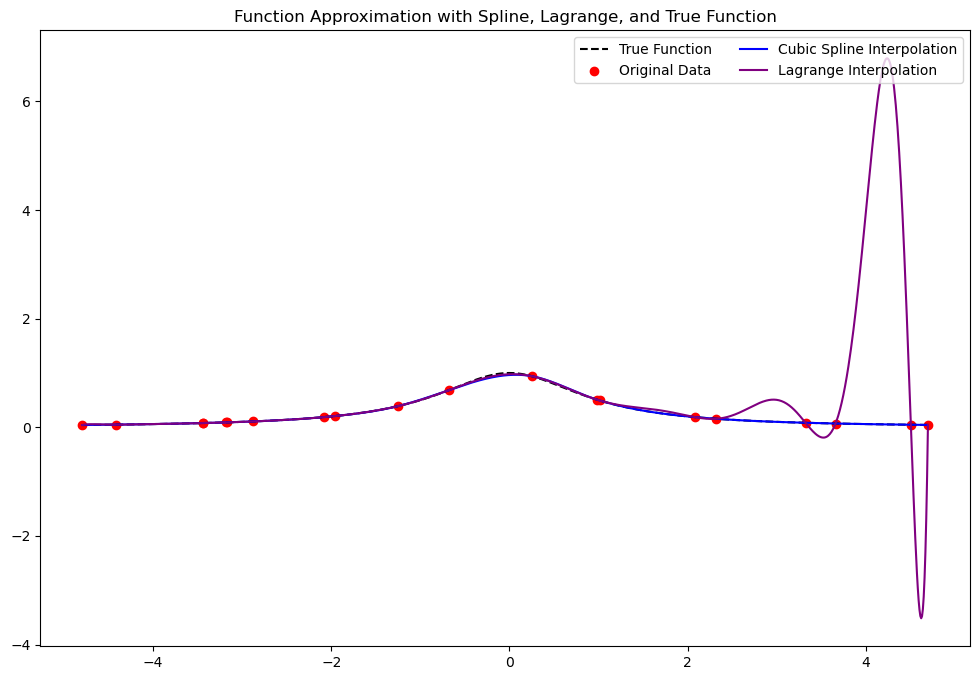

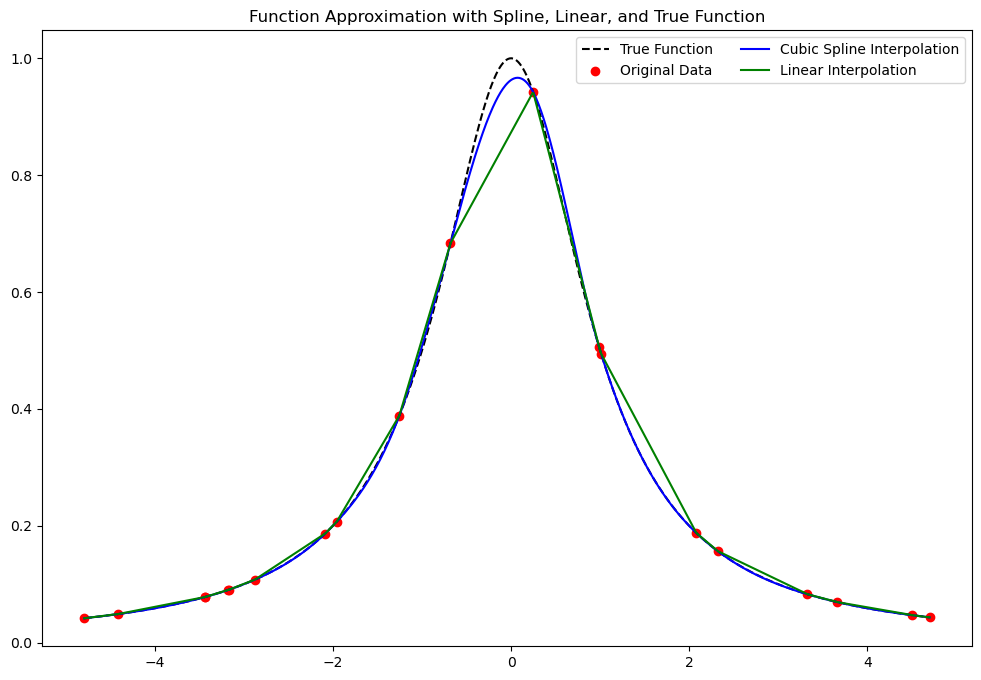

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d, lagrange

plt.rcParams['figure.figsize'] = (12, 8)

# Define the true function
def true_function(x):
    return 1 / (1 + x**2)

# Generate random data points within a range
np.random.seed(42)
num_points = 20
x_data = np.sort(np.random.uniform(-5, 5, num_points))
y_data = true_function(x_data)

# Generate points for visualization within the original data range
xs = np.linspace(min(x_data), max(x_data), 1000)

# Perform cubic spline interpolation
cs = CubicSpline(x_data, y_data)
ys_cubic = cs(xs)

# Perform Lagrange interpolation
lagrange_poly = lagrange(x_data, y_data)
ys_lagrange = lagrange_poly(xs)

#Perform linear interpolation
linear_poly = interp1d(x_data, y_data)
ys_linear = linear_poly(xs)

# Plot the true function
plt.plot(xs, true_function(xs), label='True Function', color='black', linestyle='--')

# Plot the original data points
plt.scatter(x_data, y_data, label='Original Data', color='red')

# Plot cubic spline interpolation
plt.plot(xs, ys_cubic, label="Cubic Spline Interpolation", color='blue')

# Plot Lagrange interpolation
plt.plot(xs, ys_lagrange, label="Lagrange Interpolation", color='purple')

plt.legend(loc='upper right', ncol=2)
plt.title('Function Approximation with Spline, Lagrange, and True Function')
plt.show()

# Plot the true function
plt.plot(xs, true_function(xs), label='True Function', color='black', linestyle='--')

# Plot the original data points
plt.scatter(x_data, y_data, label='Original Data', color='red')

# Plot cubic spline interpolation
plt.plot(xs, ys_cubic, label="Cubic Spline Interpolation", color='blue')

# Plot linear interpolation
plt.plot(xs, ys_linear, label="Linear Interpolation", color='green')

plt.legend(loc='upper right', ncol=2)
plt.title('Function Approximation with Spline, Linear, and True Function')
plt.show()


On the interval approximately (2, 5), we see that Lagrange is experiencing issues. That is due to the fact that for 20 points, Lagrange polynomial is a very high 19th degree polynomial which is forecasted to have unexpected behavior on small intervals. Therefore, function values and integral approximations on that interval are completely unreliable if we consider Lagrange.

Linear interpolation is very computationally and time wise cheap as it is a very simple linear system. For our specific case, it performs solid. Piecewise combination and simplicity makes the model more robust to unexpected shocks like with Lagrange, however, the tradeoff comes with the smoothness of it. It is linear and most real-world functions are smoother, therefore we can do better.

Spline interpolation is the golden middle. Its function is less complex than Lagrange as it's a piecewise combination of cubic polynomials which are smooth and reliable. Just like with the linear interpolation, division of function into subintervals explicitly avoids unexpeceted and deviating from the data behavior. Moreover, as it's differentiable two times, the resulting pieces are very smooth and that is what we aim for. It is more complex than linear interpolation, however the smoothness wins us a lot of accuracy.

## Runge's Phenomenon

Runge's phenomenon is a phenomenon in numerical analysis and interpolation theory that occurs when using high-degree polynomial interpolation to approximate a function, especially when using equidistant interpolation points. Named after the German mathematician Carl David Tolmé Runge, this phenomenon is characterized by oscillations and overshooting in the interpolated function, particularly near the edges of the interpolation interval.

The general idea is that as the degree of the interpolating polynomial increases, the oscillations in the interpolated function become more pronounced, leading to poor approximation, even if the function being approximated is smooth. This is particularly evident when equally spaced interpolation points are used.

Runge's phenomenon again underscores the importance of carefully choosing interpolation methods and number of points depending on the case.

Lagrange interpolation as evidenced before, struggles in such scenarios, while spline can handle if we properly choose the number of points to use for interpolation.

Below, we are addressing Runge's famous counterexample for interpolation: $f(x) = \frac{1}{1 + 25x^2}$.If this function is interpolated at equally spaced points in the interval [-1,1], the polynomials do not converge uniformly. In fact, the maximum error goes to infinity. Let's check it.

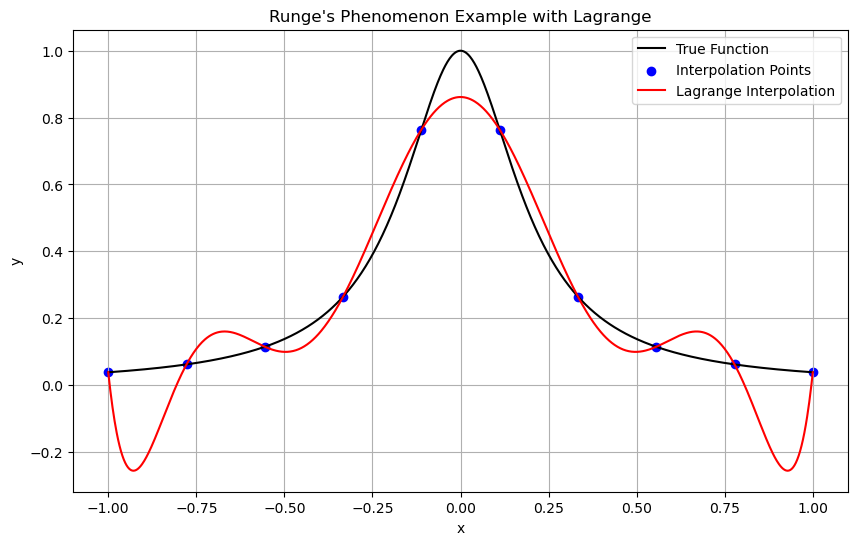

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define the function to be interpolated
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Generate equidistant interpolation points
num_points = 10
interpolation_points = np.linspace(-1, 1, num_points)

# Generate Runge's function values at the interpolation points
function_values = runge_function(interpolation_points)

# Perform Lagrange interpolation using the interpolation points
lagrange_poly = lagrange(interpolation_points, function_values)

# Generate a finer grid for plotting
x_fine = np.linspace(-1, 1, 1000)

# Evaluate the Lagrange interpolation polynomial on the finer grid
y_lagrange = lagrange_poly(x_fine)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(x_fine, runge_function(x_fine), label="True Function", color='black')
plt.scatter(interpolation_points, function_values, label="Interpolation Points", color='blue')
plt.plot(x_fine, y_lagrange, label="Lagrange Interpolation", color='red')

plt.title("Runge's Phenomenon Example with Lagrange")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


As we can see, lagrange does not perform well, let's see spline and linear methods:

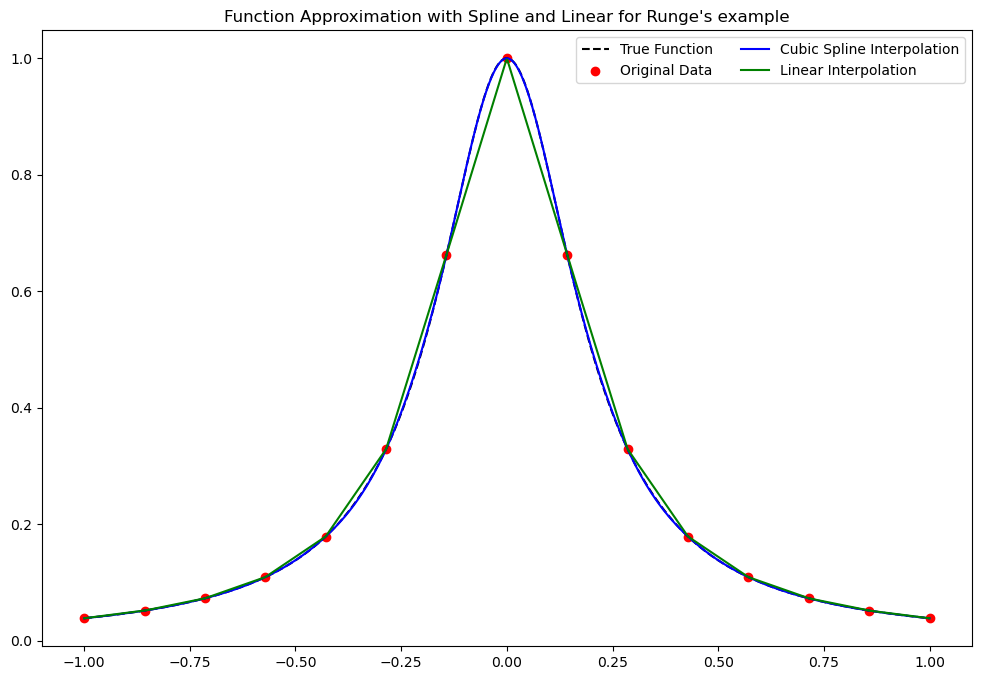

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d, lagrange

plt.rcParams['figure.figsize'] = (12, 8)

# Define the function to be interpolated
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Generate equidistant interpolation points
num_points = 15
x_data = np.linspace(-1, 1, num_points)
y_data = runge_function(x_data)

# Generate points for visualization within the original data range
xs = np.linspace(min(x_data), max(x_data), 1000)

# Perform cubic spline interpolation
cs = CubicSpline(x_data, y_data)
ys_cubic = cs(xs)

#Perform linear interpolation
linear_poly = interp1d(x_data, y_data)
ys_linear = linear_poly(xs)

# Plot the true function
plt.plot(xs, runge_function(xs), label='True Function', color='black', linestyle='--')

# Plot the original data points
plt.scatter(x_data, y_data, label='Original Data', color='red')

# Plot cubic spline interpolation
plt.plot(xs, ys_cubic, label="Cubic Spline Interpolation", color='blue')

# Plot linear interpolation
plt.plot(xs, ys_linear, label="Linear Interpolation", color='green')

plt.legend(loc='upper right', ncol=2)
plt.title("Function Approximation with Spline and Linear for Runge's example")
plt.show()


I added 5 more points and made it 15, to achieve this result. We can conclude, based on the figure, that Runge's phenomenon of polynomials not converging can be avoided by spline.

## Spline's effectiveness in approximating volatile or higly oscillated functions

Spline interpolation is often considered a data-driven approach, where the shape of the interpolating function is influenced by the data distribution. This can lead to better generalization and less sensitivity to outliers.

Sometimes, the function we are trying to approximate can be complex with high variation between equally distant points. Lagrange's general over the interval smothness will not capture such shocks from the true function. Let's again compare the performance of interpolations on such functions:

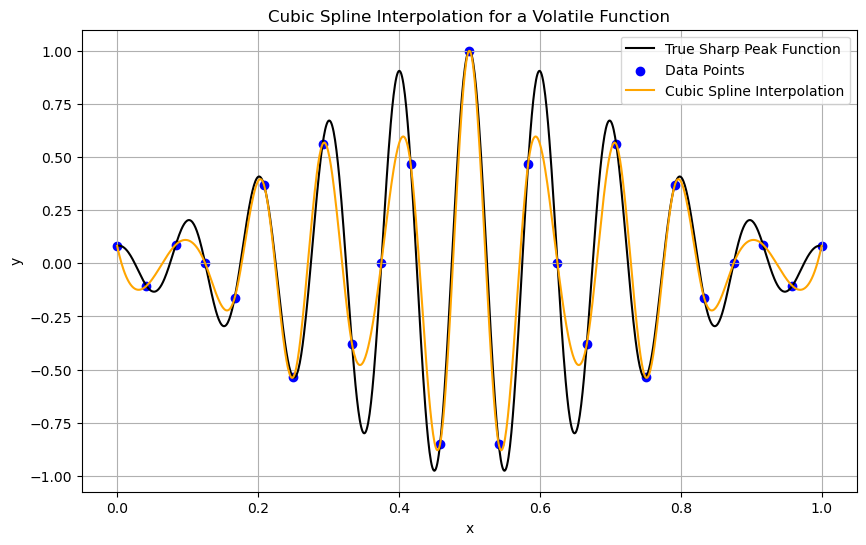

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, lagrange

# Function with a sharp peak
def sharp_peak_function(x):
    return np.exp(-10 * (x - 0.5)**2) * np.cos(20 * np.pi * x)

# Generate data points from the sharp peak function
num_points = 25
x_data = np.linspace(0, 1, num_points)
y_data = sharp_peak_function(x_data)

# Choose a range for interpolation
interp_x = np.linspace(0, 1, 1000)

# Cubic spline interpolation
cubic_interp = CubicSpline(x_data, y_data)
y_cubic = cubic_interp(interp_x)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(interp_x, sharp_peak_function(interp_x), label="True Sharp Peak Function", color='black')
plt.scatter(x_data, y_data, label="Data Points", color='blue')

plt.plot(interp_x, y_cubic, label="Cubic Spline Interpolation", color='orange')

plt.title("Cubic Spline Interpolation for a Volatile Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


With a relatievely high number of points to approximate a function with: 30 in our case, Spline does a great job even for a highly oscilated functions. However, as noted, we need more points which inreases computation time.

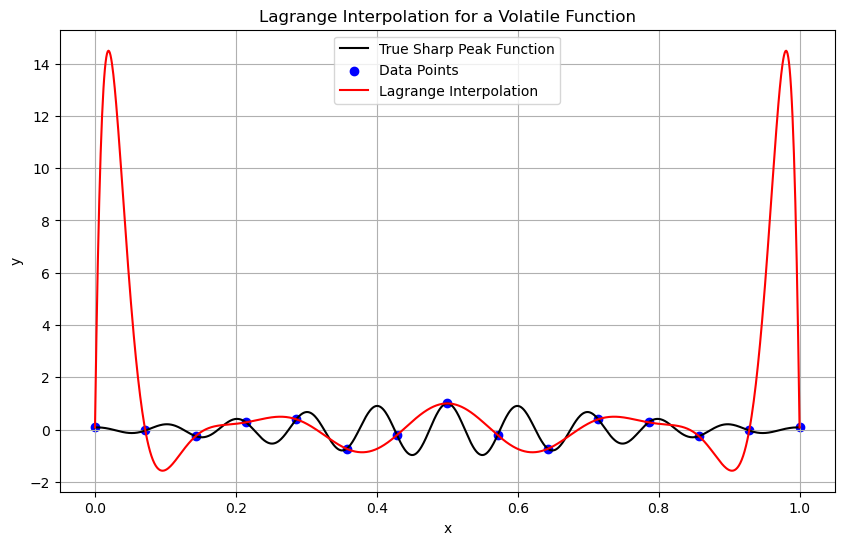

In [6]:
# Generate data points from the sharp peak function
num_points = 15
x_data = np.linspace(0, 1, num_points)
y_data = sharp_peak_function(x_data)

# Choose a range for interpolation
interp_x = np.linspace(0, 1, 1000)

# Lagrange interpolation
lagrange_poly = lagrange(x_data, y_data)
y_lagrange = lagrange_poly(interp_x)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(interp_x, sharp_peak_function(interp_x), label="True Sharp Peak Function", color='black')
plt.scatter(x_data, y_data, label="Data Points", color='blue')

plt.plot(interp_x, y_lagrange, label="Lagrange Interpolation", color='red')

plt.title("Lagrange Interpolation for a Volatile Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

This was one of the best results for a Lagrange over this interval with optimal number of points chosen. We can see its generalization of the whole interval with one complex function fails to capture highly volatile functions.

I did not plot linear interpolation, however we can clearly conlcude that the linear approach requires smoothness for our particular case.

## Remark

In the given above examples apart from the first example, we are changing number of points to find an optimum for the better approximation, however in reality, we have a pre-defined grid and number of points. If the number of points is very low and the true function is smooth, there might be cases when Lagrange can be better than both linear and spline, but the error difference is almost insignificant.

Given higher amount of points, we must definetly use Spline instead.

However, Lagrage interpolation can be very intuitive and easy to implement (both in code and handwritten computation), therefore it is mostly the method which is demonstrated for college students in advanced maths classes.

## Accuracy of Spline interpolation's piecewise functions (based on derivatives)

We have looked at accuracies of interpolations based on graphical comparison before. Same things can be captured by looking into accuracies in terms of derivatives as they tell the functions rate at a certain point.

In the given example below, we will showcase Spline's ability to approximate the derivative of a true function at a specific point in a solid level.

Error in First Derivative: [2.66453526e-15 8.88178420e-16 1.77635684e-15 1.77635684e-15
 3.55271368e-15 7.10542736e-15 3.55271368e-15 1.42108547e-14
 3.55271368e-14 1.42108547e-13]
Error in Second Derivative: [1.42108547e-14 0.00000000e+00 4.44089210e-15 7.10542736e-15
 2.66453526e-14 8.88178420e-14 4.97379915e-14 6.75015599e-14
 1.13686838e-13 7.60280727e-13]


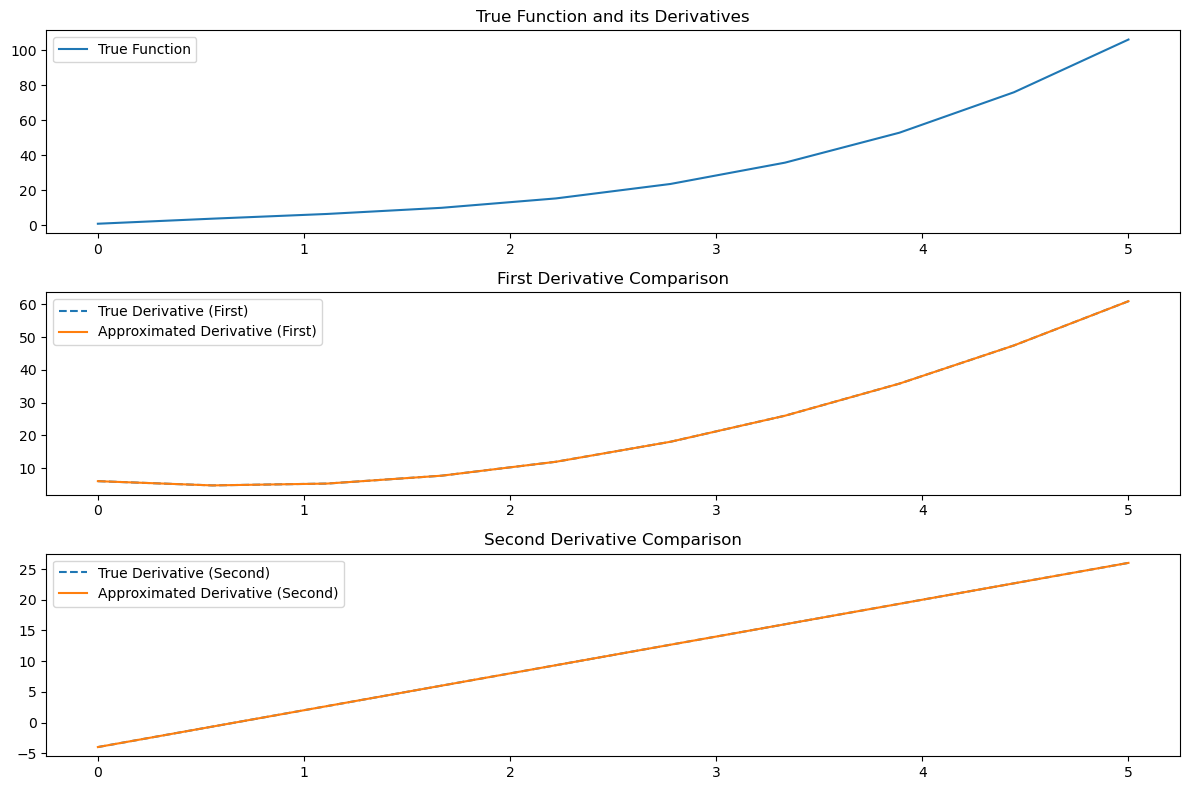

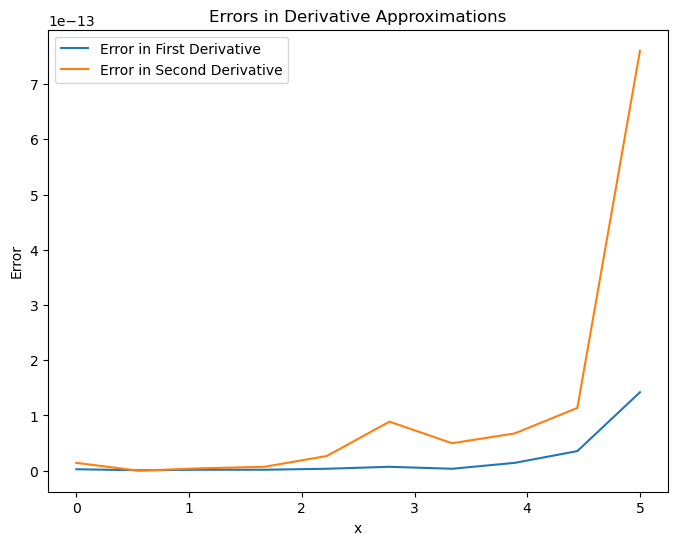

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Step 1: Select Equally Distant Grid
start = 0
end = 5
num_points = 10
x_points = np.linspace(start, end, num_points)

# Step 2: Define True Function and Evaluate
def true_function(x):
    return x**3 - 2*x**2 + 6*x + 1

def true_derivative_1(x): 
    return 3*x**2-4*x+6  

def true_derivative_2(x):
    return 6*x-4

y_points_true = true_function(x_points)    #true function and derivative values
y_prime_true = true_derivative_1(x_points)
y_double_prime_true = true_derivative_2(x_points)

# Step 3: Perform Spline Interpolation
cs = CubicSpline(x_points, y_points_true)

# Step 4: Calculate First and Second Derivatives from Spline
y_prime_approx = cs.derivative(nu=1)(x_points)
y_double_prime_approx = cs.derivative(nu=2)(x_points)

# Step 6: Compare Approximated vs True Derivatives
error_prime = np.abs(y_prime_true - y_prime_approx)
error_double_prime = np.abs(y_double_prime_true - y_double_prime_approx)

# Print or plot the results
print("Error in First Derivative:", error_prime)
print("Error in Second Derivative:", error_double_prime)


# Plot the results
plt.figure(figsize=(12, 8))

# Plot the true function and its derivatives
plt.subplot(3, 1, 1)
plt.plot(x_points, y_points_true, label='True Function')
plt.title('True Function and its Derivatives')
plt.legend()

# Plot the true and approximated first derivatives
plt.subplot(3, 1, 2)
plt.plot(x_points, y_prime_true, label='True Derivative (First)', linestyle='dashed')
plt.plot(x_points, y_prime_approx, label='Approximated Derivative (First)')
plt.title('First Derivative Comparison')
plt.legend()

# Plot the true and approximated second derivatives
plt.subplot(3, 1, 3)
plt.plot(x_points, y_double_prime_true, label='True Derivative (Second)', linestyle='dashed')
plt.plot(x_points, y_double_prime_approx, label='Approximated Derivative (Second)')
plt.title('Second Derivative Comparison')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Plot the errors
plt.figure(figsize=(8, 6))
plt.plot(x_points, error_prime, label='Error in First Derivative')
plt.plot(x_points, error_double_prime, label='Error in Second Derivative')
plt.title('Errors in Derivative Approximations')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.show()


Errors or differences of first, second derivatives of the true function between the spline polynomial's corresponding values is significantly small. Constraints for the spline functions for find the coefficients of piecewise functions include first and second derivatives of the true function and the spline interpolant to be equal, and that is exactly what we see.

Note: in the graph above, we cannot see the plot of derivatives for the true function as it is overlapped by the lagrange derivative values. It also highlights how accurate and effective the Spline method is.